In [1]:
# Conjunto de Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSampler
from qiskit_algorithms.utils import algorithm_globals
from sklearn.feature_selection import SelectKBest, chi2
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 42

In [2]:
# Carregando o dataset
from sklearn.datasets import load_iris

data = load_iris()              # leitura do dataset (diretamente pelo sklearn)
# dados = pd.read_csv("../data/iris.csv") -> leitura também poderia ser feita por .csv

In [3]:
# Atribuindo valores para X e Y (data e target)
X, y = data.data, data.target
print(X)                        # valores da data

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
y           # valores do target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.preprocessing import MinMaxScaler  # importação do sklearn para usar MinMax

normalizador = MinMaxScaler(feature_range=(-1,1))         # função MinMax para criação de um normalizador
X_normalizado = normalizador.fit_transform(X)
print(X_normalizado)

[[-5.55555556e-01  2.50000000e-01 -8.64406780e-01 -9.16666667e-01]
 [-6.66666667e-01 -1.66666667e-01 -8.64406780e-01 -9.16666667e-01]
 [-7.77777778e-01  0.00000000e+00 -8.98305085e-01 -9.16666667e-01]
 [-8.33333333e-01 -8.33333333e-02 -8.30508475e-01 -9.16666667e-01]
 [-6.11111111e-01  3.33333333e-01 -8.64406780e-01 -9.16666667e-01]
 [-3.88888889e-01  5.83333333e-01 -7.62711864e-01 -7.50000000e-01]
 [-8.33333333e-01  1.66666667e-01 -8.64406780e-01 -8.33333333e-01]
 [-6.11111111e-01  1.66666667e-01 -8.30508475e-01 -9.16666667e-01]
 [-9.44444444e-01 -2.50000000e-01 -8.64406780e-01 -9.16666667e-01]
 [-6.66666667e-01 -8.33333333e-02 -8.30508475e-01 -1.00000000e+00]
 [-3.88888889e-01  4.16666667e-01 -8.30508475e-01 -9.16666667e-01]
 [-7.22222222e-01  1.66666667e-01 -7.96610169e-01 -9.16666667e-01]
 [-7.22222222e-01 -1.66666667e-01 -8.64406780e-01 -1.00000000e+00]
 [-1.00000000e+00 -1.66666667e-01 -9.66101695e-01 -1.00000000e+00]
 [-1.66666667e-01  6.66666667e-01 -9.32203390e-01 -9.16666667e

In [6]:
# Separando em amostra de Treino e Teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, shuffle=True, random_state=42)          # separação de 30% para teste e 70% para treino

In [7]:
# Criação do FeatureMap
from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(feature_dimension=X_normalizado.shape[1], reps=1, entanglement='linear')

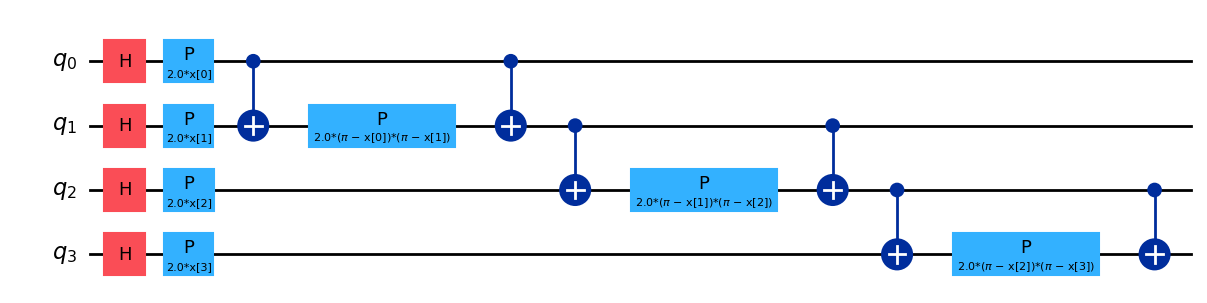

In [8]:
feature_map.decompose().draw('mpl')

In [9]:
# Escolha do back-end (simulador)
mps_backend = AerSimulator(method="matrix_product_state")
sampler = BackendSampler(backend=mps_backend)                   # criação do sample do simulador

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13072\1134067542.py:3: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend=mps_backend)                   # criação do sample do simulador


In [10]:
fidelity_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=ComputeUncompute(sampler))

In [11]:
from sklearn.svm import SVC


svc = SVC(kernel=fidelity_kernel.evaluate, C=0.5)           # utilizando o SVC
svc.fit(X_train, y_train)                                   # treinamento do modelo

SVC(C=0.5,
    kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x000001D8FA508A90>>)

In [12]:
y_pred = svc.predict(X_test)          # Usando os dados para fazer a previsão

In [14]:
# Acurácia do Modelo
accuracy_svc = svc.score(X_test, y_pred)
accuracy_svc

0.9666666666666667

## QSVC

In [15]:
# Criação do modelo QSVC usando o Kernel Quântico
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(kernel=fidelity_kernel)         # utilizando o QSVC
qsvc.fit(X_train, y_train)                  # treinamento do modelo

y_pred_qsvc = qsvc.predict(X_test)          # Usando os dados para fazer a previsão

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13072\2029354100.py:4: QiskitMachineLearningWarning: "'kernel' argument is not supported and will be discarded, please use 'quantum_kernel' instead."
  qsvc = QSVC(kernel=fidelity_kernel)         # utilizando o QSVC


In [ ]:
# Acurácia do modelo
# Acurácia do Modelo
accuracy_qsvc = qsvc.score(X_test, y_pred_qsvc)
accuracy_qsvc

0.7